# logistic Regression -bank data

Q1]Output variable -> y.  y -> Whether the client has subscribed a term deposit or not 
Binomial ("yes" or "no").

Attribute information For bank dataset:

Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job(categorical:"admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services") 
3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
4 - education (categorical: "unknown","secondary","primary","tertiary")
5 - default: has credit in default? (binary: "yes","no")
6 - balance: average yearly balance, in euros (numeric) 
7 - housing: has housing loan? (binary: "yes","no")
8 - loan: has personal loan? (binary: "yes","no")
# related with the last contact of the current campaign:
9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
10 - day: last contact day of the month (numeric)
11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
12 - duration: last contact duration, in seconds (numeric)
# other attributes:
13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
15 - previous: number of contacts performed before this campaign and for this client (numeric)
16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

Output variable (desired target):
17 - y - has the client subscribed a term deposit? (binary: "yes","no")

18. Missing Attribute Values: None


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, classification_report

import warnings
warnings.filterwarnings('ignore')


In [6]:
# Importing Dataset
data=pd.read_csv("C:\\Users\\hp\\Downloads\\bank-full.csv",delimiter=';')
data.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
data.shape

(45211, 17)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [10]:
#cheack the missing values
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [11]:
data[data.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [12]:
data[data.duplicated()].shape

(0, 17)

In [13]:
data.var()

age         1.127581e+02
balance     9.270599e+06
day         6.926361e+01
duration    6.632057e+04
campaign    9.597733e+00
pdays       1.002577e+04
previous    5.305841e+00
dtype: float64

In [14]:
data.skew()

age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

In [15]:
data.kurt()

age            0.319570
balance      140.751547
day           -1.059897
duration      18.153915
campaign      39.249651
pdays          6.935195
previous    4506.860660
dtype: float64

In [16]:
discrete_feature = [feature for feature in data.columns if len(data[feature].unique())<20 and feature]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))


Discrete Variables Count: 10


In [17]:
continuous_feature = [feature for feature in data.columns if data[feature].dtype!='O' and feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))


Continuous Feature Count 7


In [18]:
data.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [34]:
data1=pd.get_dummies(data,columns=['job','marital','default','housing','loan','education','contact','poutcome','month'])
data1['y']=data1['y'].replace('yes',1)
data1['y']=data1['y'].replace('no',0)
data1

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,33,2,5,76,1,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,47,1506,5,92,1,-1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
45207,71,1729,17,456,2,-1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
45208,72,5715,17,1127,5,184,3,1,0,0,...,0,0,0,0,0,0,0,1,0,0
45209,57,668,17,508,4,-1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [20]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   balance              45211 non-null  int64
 2   day                  45211 non-null  int64
 3   duration             45211 non-null  int64
 4   campaign             45211 non-null  int64
 5   pdays                45211 non-null  int64
 6   previous             45211 non-null  int64
 7   y                    45211 non-null  int64
 8   job_admin.           45211 non-null  uint8
 9   job_blue-collar      45211 non-null  uint8
 10  job_entrepreneur     45211 non-null  uint8
 11  job_housemaid        45211 non-null  uint8
 12  job_management       45211 non-null  uint8
 13  job_retired          45211 non-null  uint8
 14  job_self-employed    45211 non-null  uint8
 15  job_services         45211 non-null  uint8
 16  job_student          4

In [35]:
# Dividing our data into input and output variables
x=pd.concat([data1.iloc[:,0:7],data1.iloc[:,8:]],axis=1)
y=data1.iloc[:,7]


In [36]:
x.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [37]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [25]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [26]:
model.score(x_train,y_train)

0.8853367936770083

In [27]:
pred=model.predict(x)
print(classification_report(y,pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.57      0.17      0.27      5289

    accuracy                           0.89     45211
   macro avg       0.73      0.58      0.60     45211
weighted avg       0.86      0.89      0.86     45211



In [28]:
cm = confusion_matrix(y,pred)
cm

array([[39220,   702],
       [ 4371,   918]], dtype=int64)

In [29]:
(39120+1196)/(39120+1196+4093+802)

0.8917298887438898

In [30]:
df=pd.DataFrame({'actual':y,'prediction':pred})
df

,actual,prediction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,0
45207,1,0
45208,1,0
45209,0,0


In [31]:
model.predict_proba(x)[:,1]

array([0.07133253, 0.06669888, 0.07374422, ..., 0.32546941, 0.05700794,
       0.5844173 ])

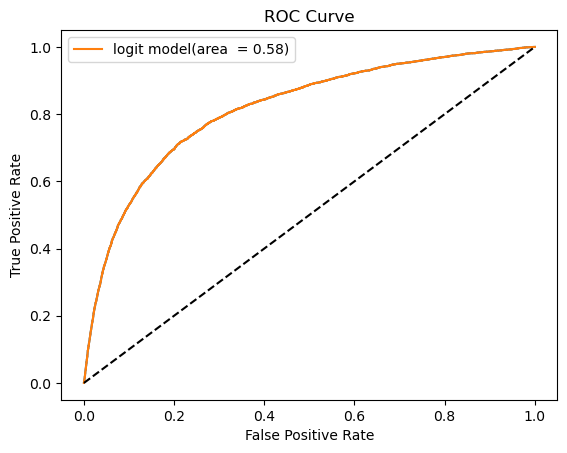

auc accuracy: 0.5779917464125949


In [32]:
fpr,tpr,thresholds=roc_curve(y,model.predict_proba(x)[:,1])
plt.plot(fpr,tpr)
auc=roc_auc_score(y,pred)

plt.title('ROC Curve')
plt.plot(fpr,tpr,label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print('auc accuracy:',auc)
